### Notebook Env Details
`kernel`: PySpark
`image`: SparkMagic
`instance`: ml.t3.medium

<div style="background-color: darkgreen; font-size: 20px; color: white;">
EMR Cluster Creation & Connection

This notebook requires the creation and connection to a EMR cluster. Auto-launching resources can be found in the resource below:
- EMR Cloud Formation Templates:

https://aws.amazon.com/blogs/machine-learning/part-1-create-and-manage-amazon-emr-clusters-from-sagemaker-studio-to-run-interactive-spark-and-ml-workloads/

With a created domain and studio-user, to launch an EMR cluster go to the Home tab -> Data -> Clusters. From there you should be able to create a cluster from template. Finally, you will need to connect via the 'Cluster' tab in the top rigt of the note book. Click on the created cluster and connect.

**Notebook Config**: Make sure to use a Studio SparkMagic - PySpark Kernel running on a ml.t3.medium instance and connected to an EMR clsuter with an m5.xlarge Master node and 2 m5.xlarge Core nodes. Please ensure that you see PySpark (SparkMagic) in the top right on your notebook.

<div style="background-color: teal; font-size: 15px; color: white;">
Spark EMR Connection

In [2]:
%load_ext sagemaker_studio_analytics_extension.magics
%sm_analytics emr connect --verify-certificate False --cluster-id j-21E5J7LS7UXYQ --auth-type None   

/opt/conda/lib/python3.7/site-packages/boto3/compat.py:82: PythonDeprecationWarning:

Boto3 will no longer support Python 3.7 starting December 13, 2023. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.8 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/



Successfully read emr cluster(j-21E5J7LS7UXYQ) details
Initiating EMR connection..
Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1701977150790_0002,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.
{"namespace": "sagemaker-analytics", "cluster_id": "j-21E5J7LS7UXYQ", "error_message": null, "success": true, "service": "emr", "operation": "connect"}


<div style="background-color: darkgreen; font-size: 20px; color: white;">
List files in AWS Open Data S3 Bucket:

- Data Dictionary: https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf

In [3]:
%%local
!aws s3 ls "s3://nyc-tlc/trip data/green" --human-readable | grep green_tripdata_2020

2022-05-12 15:46:25    6.9 MiB green_tripdata_2020-01.parquet
2022-05-12 15:46:26    6.3 MiB green_tripdata_2020-02.parquet
2022-05-12 15:46:27    3.8 MiB green_tripdata_2020-03.parquet
2022-05-12 15:46:27  696.8 KiB green_tripdata_2020-04.parquet
2022-05-12 15:46:28    1.0 MiB green_tripdata_2020-05.parquet
2022-05-12 15:47:29    1.1 MiB green_tripdata_2020-06.parquet
2022-05-12 15:47:29    1.2 MiB green_tripdata_2020-07.parquet
2022-05-12 15:47:30    1.4 MiB green_tripdata_2020-08.parquet
2022-05-12 15:47:31    1.5 MiB green_tripdata_2020-09.parquet
2022-05-12 15:47:31    1.7 MiB green_tripdata_2020-10.parquet
2022-05-12 15:47:32    1.5 MiB green_tripdata_2020-11.parquet
2022-05-12 15:47:33    1.4 MiB green_tripdata_2020-12.parquet


### Load files into a Dataframe on the Spark cluster

In [4]:
df = spark.read.parquet("s3://nyc-tlc/trip data/green_tripdata_2020*.parquet").cache()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<div style="background-color: darkgreen; font-size: 20px; color: white;">
EDA

In [7]:
print("Rows: ",df.count())
df.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Rows:  1734176
root
 |-- VendorID: long (nullable = true)
 |-- lpep_pickup_datetime: timestamp (nullable = true)
 |-- lpep_dropoff_datetime: timestamp (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- ehail_fee: integer (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- payment_type: double (nullable = true)
 |-- trip_type: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)

<div style="background-color: teal; font-size: 15px; color: white;">
Sampling Dataset For Visualization

In [10]:
print(f"Original Rows: {df.count():,}")
percent = 15/100
df_sample = df.sample(False, percent, seed=3)
print(f"Sampled {percent:.2f}% rows: {df_sample.count():,}")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Original Rows: 1,734,176
Sampled 0.15% rows: 259,566

<div style="background-color: teal; font-size: 15px; color: white;">
Pull Down Data Sample to Local as a Pandas Data Frame

In [27]:
%%spark -o df_sample

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [39]:
%%local
import matplotlib.pyplot as plt

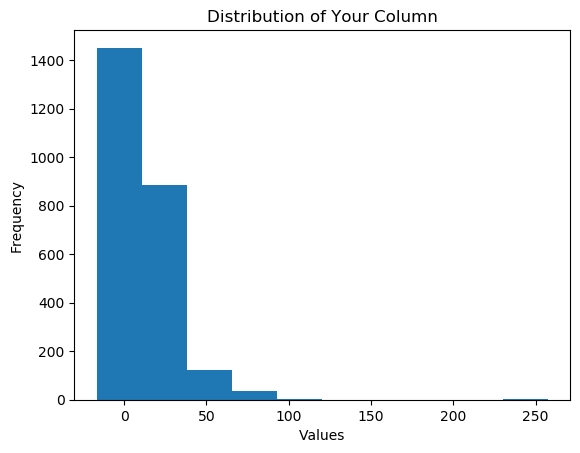

In [40]:
%matplotlib inline
df_sample['fare_amount'].plot(kind='hist', bins=10)
plt.title('Fare Amount')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

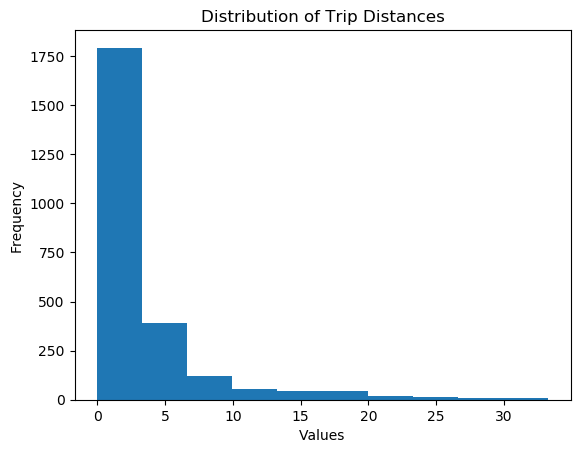

In [41]:
%matplotlib inline
df_sample['trip_distance'].plot(kind='hist', bins=10)
plt.title('Trip Distance')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

<div style="background-color: teal; font-size: 15px; color: white;">
Missing Values

In [46]:
from pyspark.sql.functions import col, count, when

# Count the number of nulls in each column
df_missing_count = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
df_missing_count.show(vertical = True)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0------------------------
 VendorID              | 0       
 lpep_pickup_datetime  | 0       
 lpep_dropoff_datetime | 0       
 store_and_fwd_flag    | 528216  
 RatecodeID            | 528216  
 PULocationID          | 0       
 DOLocationID          | 0       
 passenger_count       | 528216  
 trip_distance         | 0       
 fare_amount           | 0       
 extra                 | 0       
 mta_tax               | 0       
 tip_amount            | 0       
 tolls_amount          | 0       
 ehail_fee             | 1734176 
 improvement_surcharge | 0       
 total_amount          | 0       
 payment_type          | 528216  
 trip_type             | 528221  
 congestion_surcharge  | 528216

We are going to be removing a number of columns from this dataset. Most of them will be irrelevant to the fare amount while keeping others would create data-leakage issues within the dataset.

The features of interest for our initial model will be:
- `lpep_pickup_datetime`: The date and time of face pickup
- `PULocationID`: Pick up location
- `DOLocationID`: Drop off location
- `Trip_distance`: Trip Distance 
- `Fare_amount`: Fare Amount (USD) 

<div style="background-color: darkgreen; font-size: 20px; color: white;">
Dataset Pre-Processing

<div style="background-color: teal; font-size: 15px; color: white;">
Filter and Format Columns

** Note ** The SageMaker XGBoost algorithm we will be working with will be expecting the target col ('fare_amount') to be the first column. So it will be rearranged in the .select() method

In [5]:
%%pretty
from pyspark.sql.functions import col, dayofweek, month, hour
df_dt = df.select( col("Fare_amount").alias("fare_amount"),
                   dayofweek(col('lpep_pickup_datetime')).alias('day_of_week'),
                   month(col('lpep_pickup_datetime')).alias('month'),
                   hour(col('lpep_pickup_datetime')).alias('hour'),
                   col("PULocationID").alias("pickup_location_id"),
                   col("DOLocationID").alias("dropoff_location_id"),
                   col("Trip_distance").alias("trip_distance")
                  )
df_dt.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

fare_amount,day_of_week,month,hour,pickup_location_id,dropoff_location_id,trip_distance
8.0,4,4,0,42,41,1.68
9.0,4,4,0,244,247,1.94
6.5,4,4,0,244,243,1.0
12.0,4,4,0,244,243,2.81
21.0,4,4,0,75,169,6.79


In [18]:
fare_col_stats = df_dt.describe('trip_distance')
fare_col_stats.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------------+
|summary|    trip_distance|
+-------+-----------------+
|  count|          1734176|
|   mean|17.29138790411125|
| stddev|1198.121527606316|
|    min|           -33.69|
|    max|        205654.12|
+-------+-----------------+

In [19]:
distance_col_stats = df_dt.describe('fare_amount')
distance_col_stats.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary|       fare_amount|
+-------+------------------+
|  count|           1734176|
|   mean|16.984943217994132|
| stddev| 13.80534758423543|
|    min|            -210.0|
|    max|             803.0|
+-------+------------------+

In [29]:
neg_distance_count = df_dt[(df_dt.trip_distance < 0)]
neg_fare_count = df_dt[(df_dt.fare_amount < 0)]

print('Travel Distance: ', neg_distance_count.count())
print('Fare Amount: ',neg_fare_count.count())

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Travel Distance:  0
Fare Amount:  0

<div style="background-color: teal; font-size: 15px; color: white;">
Filter Out Negative Trip Distances and Fare Amounts

In [6]:
df_dt = df_dt[
    (df_dt.fare_amount > 0)
    & (df_dt.fare_amount < 200)    
]

df_dt = df_dt[(df_dt.trip_distance > 0)]

df_dt.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1662321

<div style="background-color: teal; font-size: 15px; color: white;">
Create Train, Test and Validation Sets

In [7]:
train_df, val_df = df_dt.randomSplit([0.8, 0.2], seed=42)
val_df, test_df = val_df.randomSplit([0.05, 0.95], seed=42)

print("Train Count:", train_df.count())
print("Validation Count:", val_df.count())
print("Test Count:", test_df.count())

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Train Count: 1329680
Validation Count: 16720
Test Count: 315921

<div style="background-color: teal; font-size: 15px; color: white;">
Create S3 Bucket and Path

In [8]:
%%local 
import sagemaker

sess = sagemaker.Session()
role = sagemaker.get_execution_role()
bucket = sess.default_bucket()

data_bucket = f"{bucket}/nyc-taxi/data/processed"
print(data_bucket)

sagemaker-us-east-1-717145514721/nyc-taxi/data/processed


<div style="background-color: teal; font-size: 15px; color: white;">
Send local variable spark context

In [9]:
%%send_to_spark -i data_bucket -t str -n data_bucket

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Successfully passed 'data_bucket' as 'data_bucket' to Spark kernel

<div style="background-color: teal; font-size: 15px; color: white;">
Write datasets to S3 as .csv

In [10]:
train_df.write.csv(f"s3://{data_bucket}/train", mode='overwrite')
test_df.write.csv(f"s3://{data_bucket}/test", mode='overwrite')
val_df.write.csv(f"s3://{data_bucket}/validation", mode='overwrite')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<div style="background-color: teal; font-size: 15px; color: white;">
Store data_bucket as a local varible to use in the next notebook

In [34]:
%store data_bucket

Stored 'data_bucket' (str)


<div style="background-color: teal; font-size: 15px; color: white;">
Disconnect from spark cluster

In [11]:
%%cleanup -f

 *** You can now also terminate the spark cluster: Home tab -> Data -> Clusters -> 'Terminate Cluster'